##CARGAR LOS ARCHIVOS DESDE KAGGLE

Instalar libreria para abrir Datasets

In [1]:
!pip install opendatasets
import opendatasets as od

Asignar a dataset_link el link de los datos que se desean importar

In [3]:
dataset_link="https://www.kaggle.com/competitions/tabular-playground-series-sep-2021"
od.download(dataset_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: juansebas0212
Your Kaggle Key: ··········


100%|██████████| 597M/597M [00:08<00:00, 72.4MB/s]



Extracting archive ./tabular-playground-series-sep-2021/tabular-playground-series-sep-2021.zip to ./tabular-playground-series-sep-2021


Copiar ruta donde se cargaron los archivos

In [5]:
import os
os.chdir("tabular-playground-series-sep-2021")
os.listdir()

['dataframeModificado.csv',
 '.ipynb_checkpoints',
 'sample_solution.csv',
 'dataframeLimpio.csv',
 'train.csv',
 'test.csv']

##Cargar Dataset

In [6]:
import pandas as pd
import numpy as np
df= pd.read_csv("train.csv")
print(df.shape)


(957919, 120)


#Miro si hay datos faltantes en las columnas

In [16]:
k=df.isna().sum()
k[k!=0]

f1      15247
f2      15190
f3      15491
f4      15560
f5      15405
        ...  
f114    15438
f115    15559
f116    15589
f117    15407
f118    15212
Length: 118, dtype: int64

#Elimino datos de forma aleatoria

In [17]:
dfAux=df.copy()
columna_seleccionada=["f1","f2","f3"]

for col in columna_seleccionada:
  datosEliminar=int(len(dfAux[col])*0.05)
  num_filas=len(dfAux)

  indices_aleatorios=np.random.choice(num_filas, size=datosEliminar)
  for indice in indices_aleatorios:
    dfAux.at[indice,col]=np.nan

k=dfAux.isna().sum()
k[k!=0]

ccols=[i for i in dfAux.columns if not i in dfAux._get_numeric_data()]
print(ccols)

[]


#Función para categorizar

In [18]:
def categorizarValor(valor,a,b):
  if valor < a:
    return "Bajo"

  elif a<=valor<=b:
    return "Medio"

  else:
    return "Alto"

In [19]:
dfAux2=dfAux.copy()
columnasCategorizar=["f6","f10","f20","f30","f40","f50","f60","f70","f80","f90","f100","f110"]

for col in columnasCategorizar:
  max=dfAux2[col].max()
  min=dfAux2[col].min()
  intervalo=max-min
  dfAux2[col]=dfAux2[col].apply(categorizarValor, args=(min+((intervalo)*0.33),(max-((intervalo)*0.33))))

ccols=[i for i in dfAux2.columns if not i in dfAux2._get_numeric_data()]
print(ccols)

dfAux2["f80"]




['f6', 'f10', 'f20', 'f30', 'f40', 'f50', 'f60', 'f70', 'f80', 'f90', 'f100', 'f110']


0          Bajo
1          Bajo
2          Bajo
3          Bajo
4          Bajo
          ...  
957914     Bajo
957915    Medio
957916    Medio
957917     Bajo
957918     Bajo
Name: f80, Length: 957919, dtype: object

#Exportar

In [20]:
dfAux2.to_csv("dataframeModificado.csv")

##Parte 2 -- DATA EXPLORATION


#Librerías


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

#Cargar Dataset

In [22]:
dfMod= pd.read_csv("dataframeModificado.csv")
dfMod.head()

,Unnamed: 0,id,f1,f2,f3,f4,f5,f6,f7,f8,...,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0,0.10859,0.004314,-37.566,0.017364,0.28915,Bajo,135.12,168900.0,...,Alto,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,1
1,1,1,0.10090,NaN,11822.000,0.276500,0.45970,Medio,1721.90,119810.0,...,Medio,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,0
2,2,2,0.17803,-0.006980,907.270,0.272140,0.45948,Medio,2298.00,360650.0,...,Alto,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,1
3,3,3,NaN,0.007259,780.100,0.025179,0.51947,Alto,112.51,259490.0,...,Medio,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486,1
4,4,4,NaN,0.502900,-109.150,0.297910,0.34490,Medio,2538.90,65332.0,...,Alto,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,1


#Valores faltantes en columnas

In [23]:
#Valores faltantes en columnas
k = dfMod.isna().sum()
k[k!=0]

f1      61250
f2      61059
f3      61512
f4      15560
f5      15405
        ...  
f114    15438
f115    15559
f116    15589
f117    15407
f118    15212
Length: 106, dtype: int64

#Inspeccionar variable respuesta

<ipython-input-24-bb1eb6ed1a1e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfMod['claim']);


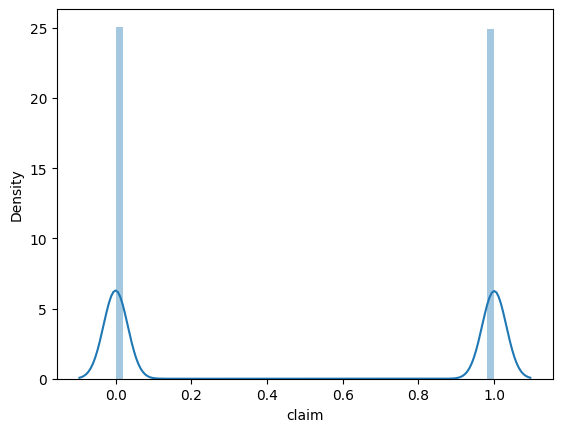

In [24]:
#Inspeccionar variable respuesta
sns.distplot(dfMod['claim']);

#Tipos de variables

In [25]:
#Tipos de variables
for c in dfMod.columns:
    print ("%20s"%c, dfMod[c].dtype)

          Unnamed: 0 int64
                  id int64
                  f1 float64
                  f2 float64
                  f3 float64
                  f4 float64
                  f5 float64
                  f6 object
                  f7 float64
                  f8 float64
                  f9 float64
                 f10 object
                 f11 float64
                 f12 float64
                 f13 float64
                 f14 float64
                 f15 float64
                 f16 float64
                 f17 float64
                 f18 float64
                 f19 float64
                 f20 object
                 f21 float64
                 f22 float64
                 f23 float64
                 f24 float64
                 f25 float64
                 f26 float64
                 f27 float64
                 f28 float64
                 f29 float64
                 f30 object
                 f31 float64
                 f32 float64
                 f33 f

#Inspeccionar columnas numéricas

In [26]:
#Inspeccionar columnas numéricas
dfMod._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,957919.0,4.789590e+05,2.765275e+05,0.000000e+00,2.394795e+05,4.789590e+05,7.184385e+05,9.579180e+05
id,957919.0,4.789590e+05,2.765275e+05,0.000000e+00,2.394795e+05,4.789590e+05,7.184385e+05,9.579180e+05
f1,896669.0,9.018879e-02,4.356018e-02,-1.499100e-01,7.022600e-02,9.013000e-02,1.164700e-01,4.151700e-01
f2,896860.0,3.459300e-01,1.462741e-01,-1.904400e-02,2.829800e-01,3.891100e-01,4.584200e-01,5.189900e-01
f3,896407.0,4.067856e+03,6.415521e+03,-9.421700e+03,4.184750e+02,1.278500e+03,4.445600e+03,3.954400e+04
...,...,...,...,...,...,...,...,...
f115,942360.0,1.208876e+00,1.149588e-01,9.052700e-01,1.146800e+00,1.177200e+00,1.242000e+00,1.886700e+00
f116,942330.0,4.276905e+16,6.732441e+16,-8.944400e+15,2.321100e+14,1.327500e+16,5.278700e+16,3.249900e+17
f117,942512.0,3.959205e+03,3.155992e+03,-4.152400e+02,1.306200e+03,3.228000e+03,6.137900e+03,1.315100e+04
f118,942707.0,5.592672e-01,4.084261e-01,-1.512400e-01,2.765600e-01,4.734400e-01,7.462100e-01,2.743600e+00


#Pair plot

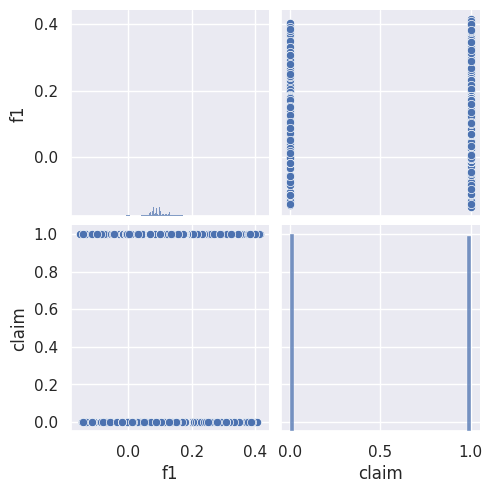

In [27]:
#Pair plot
cols = ['f1', 'f10', 'f20', 'f30', 'f90', 'f100', 'claim']
sns.set()
sns.pairplot(dfMod[cols])

#Correlaciones

<ipython-input-28-4cc83fc627a0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = dfMod.corr()


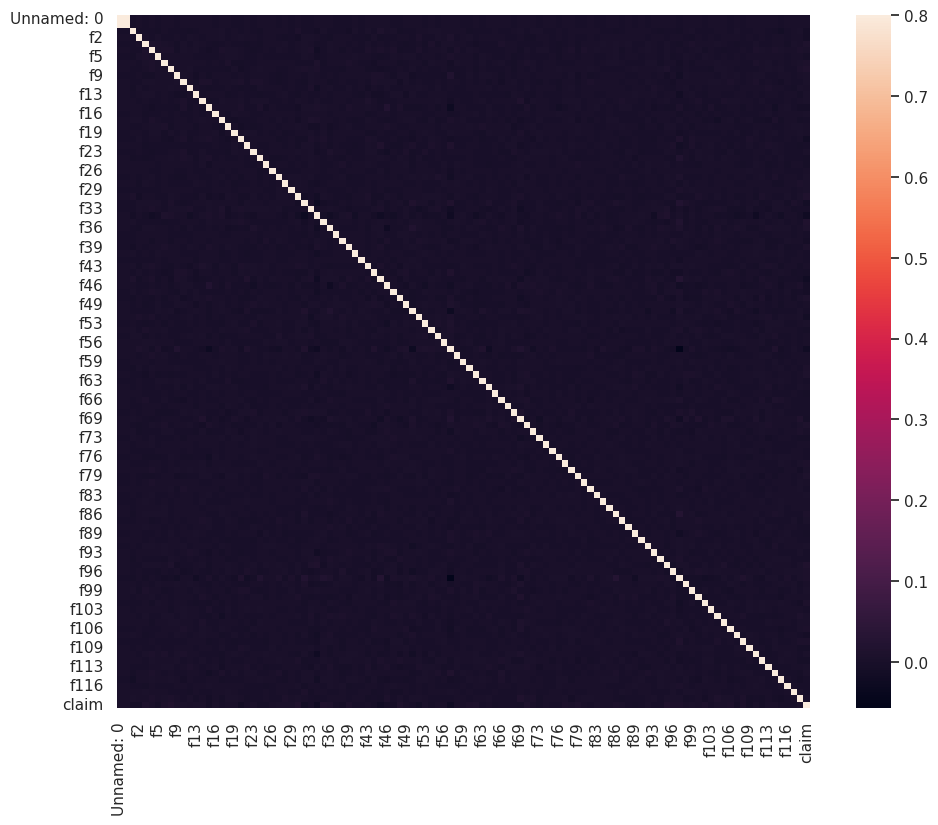

In [28]:
#Correlaciones
corrmat = dfMod.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

#Inspeccionar variables categóricas


In [29]:
#Inspeccionar variables categóricas
ccols = [i for i in dfMod.columns if not i in dfMod._get_numeric_data()]
print (ccols)

for c in ccols:
    print ("%10s"%c, np.unique(dfMod[c].dropna()))

c="f6"
dfMod[c].value_counts()

['f6', 'f10', 'f20', 'f30', 'f40', 'f50', 'f60', 'f70', 'f80', 'f90', 'f100', 'f110']
        f6 ['Alto' 'Bajo' 'Medio']
       f10 ['Alto' 'Bajo' 'Medio']
       f20 ['Alto' 'Bajo' 'Medio']
       f30 ['Alto' 'Bajo' 'Medio']
       f40 ['Alto' 'Bajo']
       f50 ['Alto' 'Bajo' 'Medio']
       f60 ['Alto' 'Bajo' 'Medio']
       f70 ['Alto' 'Bajo']
       f80 ['Alto' 'Bajo' 'Medio']
       f90 ['Alto' 'Bajo' 'Medio']
      f100 ['Alto' 'Bajo' 'Medio']
      f110 ['Alto' 'Bajo' 'Medio']


Medio    864692
Alto      69136
Bajo      24091
Name: f6, dtype: int64

#Parte 3 - Data Cleaning

#Cargar Dataset

In [30]:
dfClean= pd.read_csv("dataframeModificado.csv")
print (dfClean.shape)

(957919, 121)


#Reparar valores faltantes en columnas

In [31]:
#Reparar valores faltantes en columnas
k = dfClean.isna().sum()
k[k!=0]

ccols = [i for i in dfClean.columns if not i in dfClean._get_numeric_data()]
print (ccols)

for i in dfClean.columns:
    if i!="id" and i!="claim" and i not in ccols:
        media=dfClean[i].mean()
        dfClean[i]=dfClean[i].fillna(media)


k = dfClean.isna().sum()
k[k!=0]

['f6', 'f10', 'f20', 'f30', 'f40', 'f50', 'f60', 'f70', 'f80', 'f90', 'f100', 'f110']


Series([], dtype: int64)

#Crear encoding para variables categóricas

In [32]:
#Crear encoding para variables categóricas

ccols = [i for i in dfClean.columns if not i in dfClean._get_numeric_data()]
print (ccols)

for i in dfClean.columns:
    if i not in dfClean._get_numeric_data():
        dummies=pd.get_dummies(dfClean[i], prefix=i, prefix_sep="_", dtype=int)
        dfClean=pd.concat([dfClean,dummies],axis=1)
        dfClean = dfClean.drop(i, axis=1)


columnaRespuesta=dfClean["claim"]
dfClean=dfClean.drop("claim",axis=1)
dfClean["claim"]=columnaRespuesta

dfClean=dfClean.drop("Unnamed: 0",axis=1)
dfClean=dfClean.drop("id",axis=1)
print(dfClean.columns)

['f6', 'f10', 'f20', 'f30', 'f40', 'f50', 'f60', 'f70', 'f80', 'f90', 'f100', 'f110']


<ipython-input-32-6a66e1bace31>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfClean["claim"]=columnaRespuesta


Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f7', 'f8', 'f9', 'f11', 'f12',
       ...
       'f90_Alto', 'f90_Bajo', 'f90_Medio', 'f100_Alto', 'f100_Bajo',
       'f100_Medio', 'f110_Alto', 'f110_Bajo', 'f110_Medio', 'claim'],
      dtype='object', length=141)


#Exportar

In [33]:
dfClean.to_csv("dataframeLimpio.csv",index=False)

#Parte 4- Algoritmo predictivo

#Librerias

In [7]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import randint
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler

#Cargar Dataset

In [8]:
df=pd.read_csv("dataframeLimpio.csv")
print(df.head)

<bound method NDFrame.head of               f1        f2         f3        f4        f5       f7        f8  \
0       0.108590  0.004314    -37.566  0.017364  0.289150   135.12  168900.0   
1       0.100900  0.345930  11822.000  0.276500  0.459700  1721.90  119810.0   
2       0.178030 -0.006980    907.270  0.272140  0.459480  2298.00  360650.0   
3       0.090189  0.007259    780.100  0.025179  0.519470   112.51  259490.0   
4       0.090189  0.502900   -109.150  0.297910  0.344900  2538.90   65332.0   
...          ...       ...        ...       ...       ...      ...       ...   
957914  0.098979  0.202530   2192.100  0.348010  0.276430  2214.20   26246.0   
957915  0.134930  0.413600   1050.100  0.000521 -0.001246  3519.90  862290.0   
957916  0.104660  0.473510   2415.400  0.252230  0.196970  3044.90   13832.0   
957917  0.090189  0.320870    657.860  0.237290  0.260250   173.20   20811.0   
957918  0.088832  0.472230   4309.400  0.017016  0.376880   458.20   42183.0   

         

#Función para las curvas de aprendizaje

In [9]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


#Separar variables para Train y Test

In [10]:
X = df.drop('claim', axis=1)  # Features
y = df['claim']  # Target variable

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=09.3)

#Modelo de regresión logística


Accuracy: 0.5050143366182284


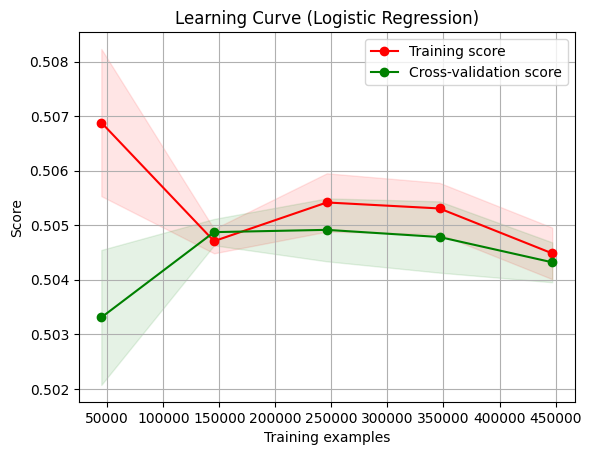

In [11]:
#Inicializar el modelo de regresión logística
model = LogisticRegression()

param_grid = {
    'fit_intercept': [True, False],
    'C': [0.01,  1],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear'],  # Solver algorithm
}

#Inicializar GridSearchCV para encontrar la mejor combinación de hiperparámetros
grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=5, cv=3, scoring='accuracy', random_state=42)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrenar el modelo con los mejores hiperparámetros
best_lr_model = LogisticRegression(**best_params)
best_lr_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = best_lr_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

plot_learning_curve(best_lr_model, "Learning Curve (Logistic Regression)", X_train, y_train, cv=3)
plt.show()

#Modelo Decision Tree Classifier

Accuracy: 0.5240660319581315


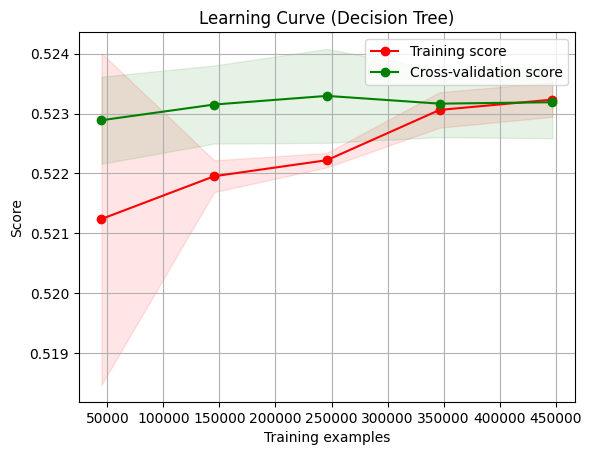

In [12]:
dt_model = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

#Inicializar GridSearchCV para encontrar la mejor combinación de hiperparámetros
grid_search = RandomizedSearchCV(estimator=dt_model, param_distributions=param_grid, n_iter=7, cv=3, scoring='accuracy', random_state=42)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrenar el modelo con los mejores hiperparámetros
best_dt_model = DecisionTreeClassifier(**best_params)
best_dt_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred2 = best_dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred2))

plot_learning_curve(best_dt_model, "Learning Curve (Decision Tree)", X_train, y_train, cv=3)
plt.show()

#Parte 5 - Algoritmos no supervisados

#Librerias

In [13]:
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

#MLP Classifier

Accuracy: 0.5025541450921441


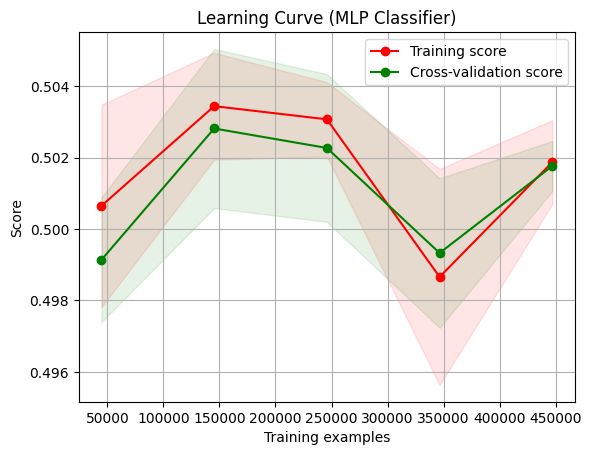

In [14]:
mlp_model = MLPClassifier()

# Definir el espacio de búsqueda para hiperparámetros

param_dist = {
    'hidden_layer_sizes': [(50,),(100,),(50,50),(100,50,25)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': randint(50, 200)
}

# Inicializar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=mlp_model, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42)

# Realizar la búsqueda aleatoria en el espacio definido
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = random_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrenar el modelo con los mejores hiperparámetros
best_mlp_model = MLPClassifier(**best_params)
best_mlp_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = best_mlp_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

plot_learning_curve(best_mlp_model, "Learning Curve (MLP Classifier)", X_train, y_train, cv=3)
plt.show()

#KMeans

In [15]:
# Preprocesamiento: Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means con el número de clusters deseado
n_clusters = 1 # Puedes ajustar este valor según tus necesidades
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Evaluar el rendimiento del clustering usando el accuracy
# Aquí, necesitarías comparar los clusters asignados por K-Means con las etiquetas reales
# Sin embargo, en clustering no hay una "verdad" conocida, por lo que el accuracy puede no ser la mejor métrica
# Puedes explorar otras métricas como la pureza o el índice de Rand ajustado.
# Aquí, solo se proporciona como una métrica simple para ilustrar el concepto.
accuracy = accuracy_score(y, labels)
print("Accuracy del clustering:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy del clustering: 0.5015079563094583
